<a id='Image Filtering'></a>
# Image Filtering

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [11]:
def read_images(directory):
    # Verificar si el directorio existe
    if not os.path.exists(directory):
        print("El directorio no existe.")
        return

    images = []
    # Leer todas las imágenes en el directorio
    for file_name in os.listdir(directory):
        file_path = os.path.join(directory, file_name)
        if os.path.isfile(file_path):
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = image.astype(np.uint8)
            if image is not None:
                images.append(image)
    
    return images

In [12]:
images = read_images("Imagenes_1_2_sust")

In [ ]:
def read_image(image_path, target_size=None):
    image = tf.keras.preprocessing.image.load_img(image_path,
                target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image)
    image = image.astype(np.uint8)
    return image

image = read_image(image_path)

We can see that the dimensions of the image are (4, 6, 1). 

That is, the image has a resolution of **4x6 pixels**, with **1 color channels (Red, Green and Blue)**.

In [13]:
images[0].shape

(4, 6)

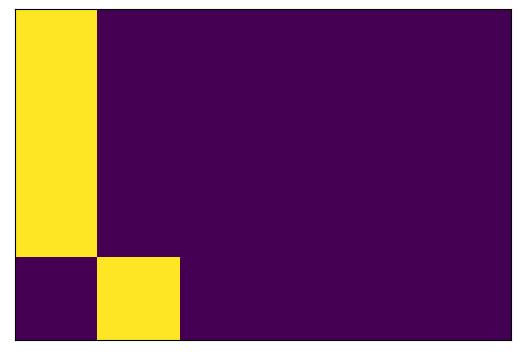

In [14]:
plt.imshow(images[0])
plt.xticks([])
plt.yticks([])
plt.show()

### Convolution examples

The following kernel performs the identity operation. The result of the convolution returns the original image.

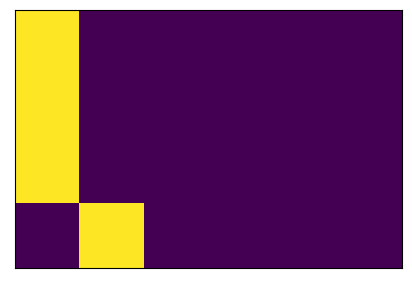

In [16]:
identity_kernel = np.array([
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]
])

img = cv2.filter2D(images[0], -1, identity_kernel)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following filter applies the [Box Blur] (https://en.wikipedia.org/wiki/Box_blur), where each pixel of the resulting image has a value equal to the mean of its pixel values neighbors.

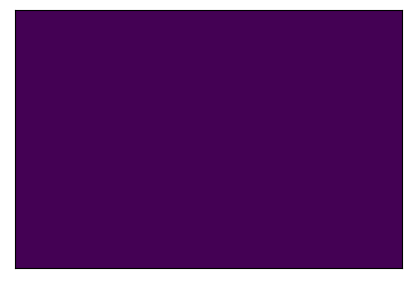

In [20]:
box_blur_filter = (1/9) * np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
])

img = cv2.filter2D(images[0], -1, box_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(img);

The following example shows a filter widely used in digital image processing: the [Gaussian filtering] (https://en.wikipedia.org/wiki/Gaussian_blur).

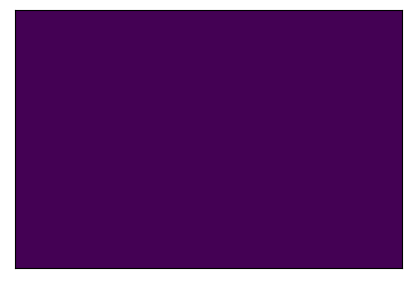

In [27]:
gaussian_blur_filter = (1/16) * np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
])

img = cv2.filter2D(images[0], -1, gaussian_blur_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img);

We can gaussian noise to the image and see the effects 

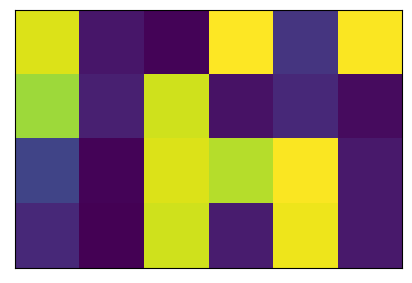

In [29]:
sigma = 20
n, m = images[0].shape
img_noise = img + sigma*np.random.randn(n, m)
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(img_noise.astype(np.uint8));

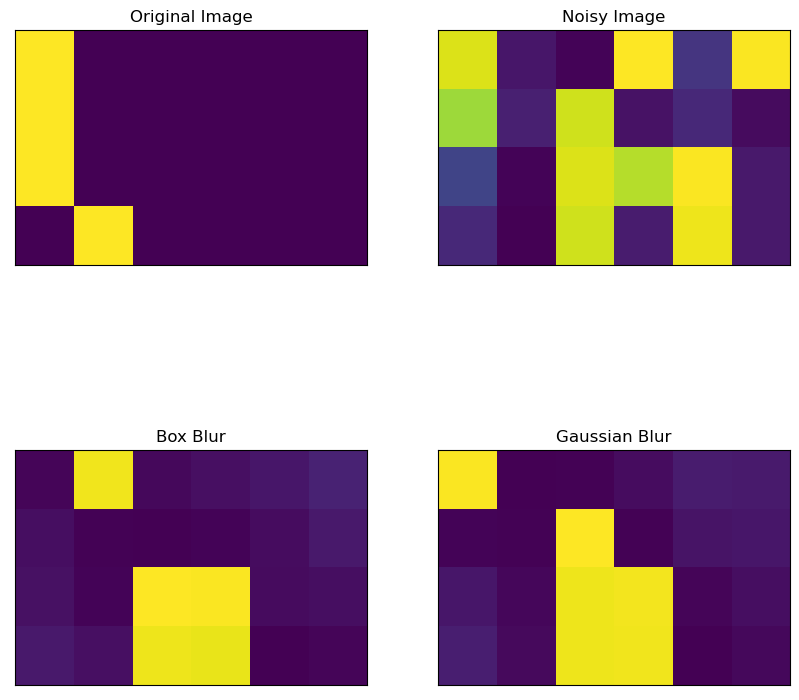

In [31]:
img1 = cv2.filter2D(img_noise, -1, gaussian_blur_filter)

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        
ax[0, 0].set_title('Original Image')
ax[0, 0].imshow(images[0].astype(np.uint8));

ax[0, 1].set_title('Noisy Image')
ax[0, 1].imshow(img_noise.astype(np.uint8));

ax[1, 0].set_title('Box Blur')
ax[1, 0].imshow(cv2.filter2D(img_noise, -1, box_blur_filter).astype(np.uint8));

ax[1, 1].set_title('Gaussian Blur')
ax[1, 1].imshow(cv2.filter2D(img_noise, -1, gaussian_blur_filter).astype(np.uint8));

The following filter is used for edge detection in images.

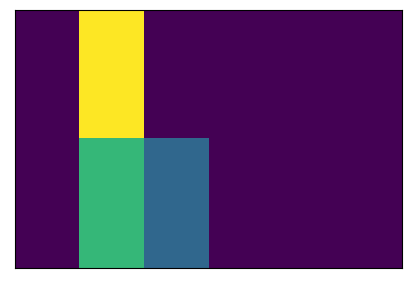

In [32]:
edge_detection_filter = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])

img = cv2.filter2D(images[0], -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

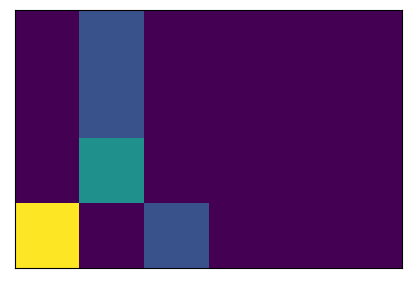

In [33]:
edge_detection_filter = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

img = cv2.filter2D(images[0], -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

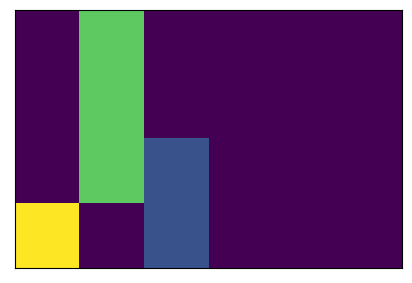

In [34]:
edge_detection_filter = np.array([
    [1, 1, 1],
    [1, -8, 1],
    [1, 1, 1]
])

img = cv2.filter2D(images[0], -1, edge_detection_filter)

fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])

plt.imshow(img);

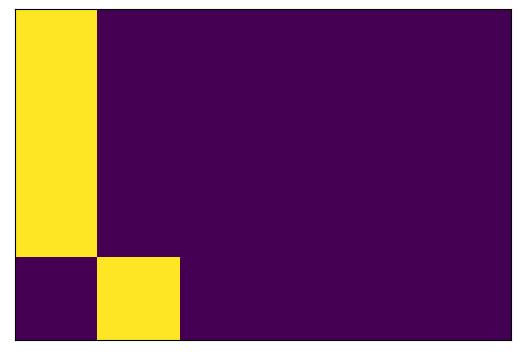

In [149]:
plt.imshow(images[0])
plt.xticks([])
plt.yticks([])
plt.show()

In [211]:
def apply_filter(image, filter, padding=0, strides=1):
    import cv2 as cv
    import scipy.signal as sig
    import numpy as np

    img = sig.convolve2d(image, filter, mode="valid")
    fig, ax = plt.subplots(1, figsize=(5, 5))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img);
    print(img)

In [219]:
def apply_filter_tf(image, filter, padding='VALID', strides=1):
    import tensorflow as tf
    
    image_float32 = np.array(image).astype(np.float32)
    filter_float32 = np.array(filter).astype(np.float32)
    imag = tf.constant(tf.reshape(image_float32, (1, image.shape[0], image.shape[1], 1)), dtype=tf.float32)
    filt = tf.constant(tf.reshape(filter_float32, (filter.shape[0], filter.shape[1], 1, 1)), dtype=tf.float32)
    img = tf.nn.conv2d(imag, filt, strides=strides, padding=padding)[0, ..., 0]
    fig, ax = plt.subplots(1, figsize=(5, 5))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img);
    print(img)

In [272]:
def apply_filter_CNN(image, filters, strides=(1, 1), padding='valid'):
    import tensorflow as tf
    
    # Obtener dimensiones de los datos de entrada y los filtros
#    input_shape = image.get_shape().as_list()
#    filter_shape = filters.get_shape().as_list()    
    filter_shape = len(filters)
    
    image_float32 = np.array(image).astype(np.float32)
    for i,filter in enumerate(filters): filters[i] = np.array(filter).astype(np.float32)
    # en el input las dimensiones tienen que ser [None,pixels_x,pixels_y,RGB(3) o GrayScale(1)]
    # en el filtro tiene que ser [kernel_x,kernel_y,RGB(3) o GrayScale(1),Nº filtros]
    inputs = tf.constant(tf.reshape(image_float32, (1, image.shape[0], image.shape[1], 1)), dtype=tf.float32)
    filters = [tf.constant(tf.reshape(filter, (filter.shape[0], filter.shape[1], 1, 1)), dtype=tf.float32) for filter in filters]
#    filters = tf.constant(tf.reshape(filter_float32, (filter.shape[0], filter.shape[1], 1, 1)), dtype=tf.float32)
    
    # Definir los strides y el padding
    try:
        strides = [1, strides[0], strides[1], 1]
    except TypeError:
        strides = [1, strides, strides, 1]
    if padding == 'valid':
        padding = 'VALID'
    elif padding == 'same':
        padding = 'SAME'

    # Realizar la convolución
    for filter in filters:
        img = tf.nn.conv2d(inputs, filter, strides=strides, padding=padding)[0,:,:,0] #el [0,:,:,0] sirve para eliminar las dos dimendiones marcadas tambien se puede poner [0,...,0]
        fig, ax = plt.subplots(1, figsize=(5, 5))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img);
        print(img)

# Ejemplo de uso
#inputs = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])  # Datos de entrada
#filters = tf.Variable(tf.random_normal([3, 3, 3, 64]))  # Filtros
#conv = custom_conv2d(inputs, filters, strides=(1, 1), padding='same')

# Verificar la forma del resultado
#print(conv.get_shape().as_list())

In [400]:
def apply_filter_CNN2(image, filters, strides=(1, 1), padding='valid'):
    import tensorflow as tf
    
    # Obtener dimensiones de los datos de entrada y los filtros
#    input_shape = image.get_shape().as_list()
#    filter_shape = filters.get_shape().as_list()    
    filter_shape = len(filters)
    filter_height = filters[0].shape[0]
    filter_width = filters[0].shape[1]
    
    image_float32 = np.array(image).astype(np.float32)
    for i,filter in enumerate(filters): filters[i] = np.array(filter).astype(np.float32)
    # en el input las dimensiones tienen que ser [None,pixels_x,pixels_y,RGB(3) o GrayScale(1)]
    # en el filtro tiene que ser [kernel_x,kernel_y,RGB(3) o GrayScale(1),Nº filtros]
    inputs = tf.constant(tf.reshape(image_float32, (1, image.shape[0], image.shape[1], 1)), dtype=tf.float32)
    filters = np.swapaxes(filters,0,1)
    filters = np.swapaxes(filters,1,2)
    filters_tf = tf.constant(tf.reshape(filters, (filter_height, filter_width, 1, filter_shape)), dtype=tf.float32)

    # Definir los strides y el padding
    try:
        strides = [1, strides[0], strides[1], 1]
    except TypeError:
        strides = [1, strides, strides, 1]
    if padding == 'valid':
        padding = 'VALID'
    elif padding == 'same':
        padding = 'SAME'

    # Realizar la convolución
    images_conv = tf.nn.conv2d(inputs, filters_tf, strides=strides, padding=padding) #el [0,:,:,0] sirve para eliminar las dos dimendiones marcadas tambien se puede poner [0,...,0]
    print(images_conv.shape)
    for i in range(images_conv.shape[3]):
        print(filters_tf[:,:,0,i])
        img = images_conv[0,:,:,i]
        fig, ax = plt.subplots(1, figsize=(5, 5))
        plt.xticks([])
        plt.yticks([])
        plt.imshow(img)
        plt.show()
        print(img)

# Ejemplo de uso
#inputs = tf.placeholder(tf.float32, shape=[None, 32, 32, 3])  # Datos de entrada
#filters = tf.Variable(tf.random_normal([3, 3, 3, 64]))  # Filtros
#conv = custom_conv2d(inputs, filters, strides=(1, 1), padding='same')

# Verificar la forma del resultado
#print(conv.get_shape().as_list())

(1, 2, 4, 1)


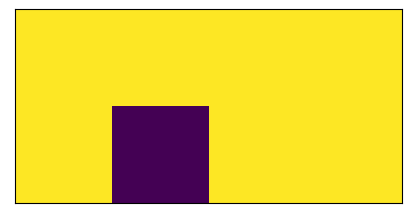

tf.Tensor(
[[ 0.  0.  0.  0.]
 [ 0. -1.  0.  0.]], shape=(2, 4), dtype=float32)


In [386]:
filter = [np.array([
    [1, 0, -1], [1, 0, -1], [1, 0, -1]
])]

#apply_filter_tf(images[0], filter, padding='VALID', strides=1)
#apply_filter(images[0], filter, padding='VALID', strides=1)
apply_filter_CNN2(images[0], filter, padding='VALID', strides=(1,1))

(1, 2, 4, 1)


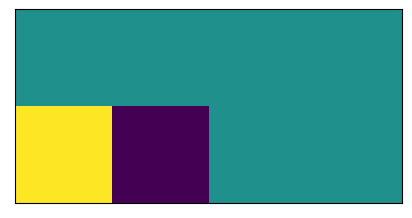

tf.Tensor(
[[ 0.  0.  0.  0.]
 [ 1. -1.  0.  0.]], shape=(2, 4), dtype=float32)


In [387]:
filters = [np.array([
    [1, 0, -1], [0, 0, 0], [-1, 0, 1]
])]

#apply_filter_tf(images[0], filter, padding='VALID', strides=[1, 1, 1, 1])
#apply_filter(images[0], filter, padding='VALID', strides=1)
apply_filter_CNN2(images[0], filters, padding='VALID', strides=1)

(1, 2, 4, 1)


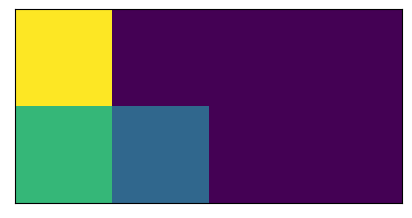

tf.Tensor(
[[3. 0. 0. 0.]
 [2. 1. 0. 0.]], shape=(2, 4), dtype=float32)


In [388]:
filters = [
    np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
]

#apply_filter_tf(images[0], filter, padding='VALID', strides=1)
#apply_filter(images[0], filter, padding=0, strides=1)
apply_filter_CNN2(images[0], filters, padding='VALID', strides=1)

(1, 4, 6, 1)
tf.Tensor(
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]], shape=(4, 6), dtype=float32)


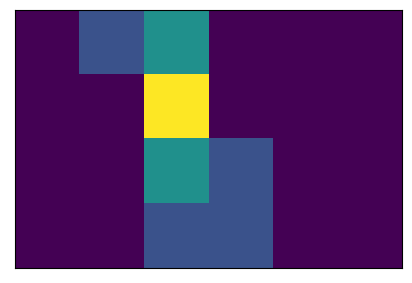

tf.Tensor(
[[0. 1. 2. 0. 0. 0.]
 [0. 0. 4. 0. 0. 0.]
 [0. 0. 2. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0.]], shape=(4, 6), dtype=float32)


In [401]:
filtros = [
    np.array([[1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0]]),   
]

apply_filter_CNN2(images[0], filtros, padding='SAME', strides=1)

OpenCV provides a multitude of techniques for digital image processing. Other examples of filters that we can apply to images are, for example, those that allow us to perform [morphological transformations] (https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html).

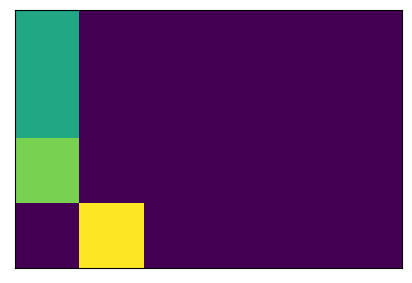

In [36]:
kernel = np.ones((1, 1), np.uint8)
dilation = cv2.dilate(img, kernel, iterations=1)


fig, ax = plt.subplots(1, figsize=(5, 5))
plt.xticks([])
plt.yticks([])
plt.imshow(dilation)

The issue is `scipy` does the mathematically 'correct' convolution, whereas `tensorflow` does the convolution oriented to a Convolutional Neural Network (CNN) application.

Therefore, `scipy` inverts the kernel before applying the convolution (as explained [here](https://stackoverflow.com/questions/40247760/scipy-convolve2d-outputs-wrong-values)) whereas `tensorflow` does not.

In [176]:
import tensorflow as tf
import numpy as np
from scipy import signal

img2 = np.array([
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0],
    [10, 10, 10, 0, 0, 0]
]).astype(np.float32)
k = np.array([
    [1., 0., -1.],
    [1., 0., -1.],
    [1., 0., -1.]
]).astype(np.float32)

img_tf = tf.constant(tf.reshape(img2, (1, 6, 6, 1)), dtype=tf.float32)
k_tf = tf.constant(tf.reshape(k, (3, 3, 1, 1)), dtype=tf.float32)
conv_tf = tf.nn.conv2d(img_tf, k_tf, strides=[1, 1], padding="SAME")[0, ..., 0]
print("conv_tf: " + str(conv_tf))

np_conv = np.array(signal.convolve2d(img2 , k, "same"), np.int32)
print("sp_conv:\n" + str(np_conv))

conv_tf: tf.Tensor(
[[-20.   0.  20.  20.   0.   0.]
 [-30.   0.  30.  30.   0.   0.]
 [-30.   0.  30.  30.   0.   0.]
 [-30.   0.  30.  30.   0.   0.]
 [-30.   0.  30.  30.   0.   0.]
 [-20.   0.  20.  20.   0.   0.]], shape=(6, 6), dtype=float32)
sp_conv:
[[ 20   0 -20 -20   0   0]
 [ 30   0 -30 -30   0   0]
 [ 30   0 -30 -30   0   0]
 [ 30   0 -30 -30   0   0]
 [ 30   0 -30 -30   0   0]
 [ 20   0 -20 -20   0   0]]


# Funciones

In [123]:
def show_results(model,X_test,y_test):
    results = model.evaluate(X_test, y_test, verbose=0)
    print('Test Loss: {}'.format(results[0]))
    print('Test Accuracy: {}'.format(results[1]))
    y_pred = model.predict(X_test)
    y_test_list = []
    if isinstance(y_test, pd.DataFrame):
        for i in range(0,len(y_test)):
            y_test_list.append(y_test.iloc[i]['energia'])
    elif isinstance(y_test, np.ndarray):
        for i in range(0,len(y_test)):
            y_test_list.append(y_test[i][0])
    else:
        for i in range(0,len(y_test)):
            y_test_list.append(y_test.iloc[i])
    try:
        if y_pred.shape[1] == 1: y_pred = np.transpose(y_pred)[0]
    except IndexError:
        pass
    print(y_test_list,y_pred)
    SSres = sum((y_test_list - y_pred)**2)
    media = np.mean(y_test_list)
    SStot = sum((y_test_list-media)**2)
    R_cuadrado = 1- SSres/SStot
    print('Coeficiente de correlacion: %s'%R_cuadrado)
    plt.plot(y_pred)
    plt.plot(y_test_list)
    plt.show()
    plt.scatter(y_test_list, y_pred)
    plt.xlabel('True Values [Energy(kcal/mol)]')
    plt.ylabel('Predictions [Energy(kcal/mol)]')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim([0,plt.xlim()[1]])
    plt.ylim([0,plt.ylim()[1]])
    _ = plt.plot([-100, 100], [-100, 100], 'r--')
    plt.show()
    error = y_pred - y_test_list
    plt.hist(error, bins = 25)
    plt.xlabel("Prediction Error [Energy(kcal/mol)]")
    _ = plt.ylabel("Count")

In [124]:
def show_loss_accuracy_evolution(history):
    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Categorical Crossentropy')
    ax1.plot(hist['epoch'], hist['loss'], label='Train loss')
    ax1.plot(hist['epoch'], hist['val_loss'], label = 'Val loss')
    ax1.grid()
    ax1.legend()

    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.plot(hist['epoch'], hist['mean_absolute_error'], label='Train Error')
    ax2.plot(hist['epoch'], hist['val_mean_absolute_error'], label = 'Val Error')
    ax2.grid()
    ax2.legend()

    plt.show()

In [125]:
def errors(real, predictions):
    mse = mean_squared_error(real, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(real, predictions)
    r2 = r2_score(real, predictions)

    print('Mean Squared Error (MSE): ', mse)
    print('Root Mean Squared Error (RMSE): ', rmse)
    print('Mean Absolute Error (MAE): ', mae)
    print('R-squared Score (R^2): ', r2)

<a id='image_classification_cnn'></a>
# Image Classification CNN

In this section we will study the problem of the additivity of the substituent effect with convolutional neural networks (CNN).

We will start by constructing a neural network using 100% mono- and di-substituted compounds as training and validation. We will work with a set of **170 compounds** as a result of **5 different substituents** in **4 different positions**.

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import math
import time

In [107]:
dataset = images
data_dir = "Imagenes_1_2_sust"

We create a TensorFlow dataset with the data that we have previously loaded to disk with the [`image_dataset_from_directory ()`](https://keras.io/api/preprocessing/image/#image_dataset_from_directory-function)
method.

The `colos_mode` parameter (by default 'rgb') allows you to choose the color scale to use. To automatically load and convert the images to grayscale it must be set as `color_mode = grayscale`.

In [110]:
image_size = (4,6)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,  # 80%  train, 20% validation
  subset='training',  # 'training' o 'validation', only  with 'validation_split'
  color_mode='grayscale',
  seed=1,
  image_size=image_size,  # Dimension (img_height, img_width) for rescaling
  batch_size=64
)

Found 0 files belonging to 0 classes.
Using 0 files for training.


ValueError: No images found in directory Imagenes_1_2_sust. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [127]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset='validation',
  seed=1,
  image_size=image_size,
  batch_size=64)


Found 0 files belonging to 0 classes.
Using 0 files for validation.


ValueError: No images found in directory Imagenes_1_2_sust. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [ ]:
class_names_list = train_ds.class_names
class_names_list

### Configure the dataset for performance

Let's make sure to use buffered prefetching so you can yield data from disk without having I/O become blocking. These are two important methods you should use when loading data.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training. 

Interested readers can learn more about both methods, as well as how to cache data to disk in the [data performance guide](https://www.tensorflow.org/guide/data_performance#prefetching).

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Visualizing some training samples.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names_list[labels[i]])
        plt.axis("off")

We build the model. The **input will have a dimension of (n, n, 3)**, corresponding to (image height, image width, number of color channels).

At the input of the network we include a preprocessing that will allow the images to be rescaled by normalizing the pixel values to a range between 0 and 1.

In [ ]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## CNN model in Keras



<img src="https://i.ibb.co/D8CmT6K/cnn.jpg" alt="cnn" border="0">



A Convolutional Neural Network (CNN) architecture has four main parts:

- A **convolutional layer** that extracts features from a source image. 

- A **pooling layer** that reduces the image dimensionality without losing important features or patterns.

- A **flattening layer** that transforms a n-dimensional tensor into a vector that can be fed into a fully connected neural network.

- A **fully connected layer** also known as the dense layer.

### Rescaling

For converting the images to   \[0,1\] range.
```python
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)
next_layer = normalization_layer(prev_layer)
```
or simply
```python
reescaling = layers.experimental.preprocessing.Rescaling(1. / 255)(inputs)
```

### Convolutional layer

In the convolutional layers (`Conv2D`) we will configure the following parameters:

- **filters**: number of feature maps.
- **kernel_size**: can be either an integer or a tuple of two integers. Specifies the height and width of the kernel.
- **padding**: allows you to include padding in the input data. With 'valid' it is not applied, with 'same' it is configured so that the dimension at the output of the convolution is the same as at the input.
- **activation**: activation function implemented. Recommended ReLU.

[Link to documentation](https://keras.io/api/layers/convolution_layers/convolution2d/)

```python
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    activation=None, kernel_regularizer=None)

```

With Functional API:
```python
next_layer = layers.Conv2D(filters=8, kernel_size=3, activation='relu', name='conv_1')(prev_layer)
```

With Sequential:
```python
model.add(layers.Conv2D(filters=8,kernel_size=3, activation='relu', name='conv_1'))
```

### Pooling layer

A pooling layer is a new layer added after the convolutional layer. Specifically, after a nonlinearity ( ReLU) you can choose between [average pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/AveragePooling2D) or [max pooling](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D). Usually max pooling is the best choice.


With Functional API:
```python
conv_1 = layers.Conv2D(filters=8, kernel_size=3, activation='relu', name='conv_1')(prev_layer)

pool_1 = layers.MaxPool2D(pool_size=(2, 2), name='pool_1')(conv_1)
```

With Sequential:
```python
model.add(layers.AveragePooling2D(pool_size=(2, 2), name='pool_1'))
```

### Flattening

Prepares a vector for the fully connected layers.

With Functional API:

```python
next_layer = layers.Flatten(name='flatten')(prev_layer)
```

With Sequential:
```python
model.add(layers.Flatten(name='flatten'))
```

There is another alternative for flattening that is a type of pooling that is called global pooling. Global pooling down-samples the entire feature map to a single value. 

You can also choose between [GlobalAveragePooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalAveragePooling2D) and [GlobalMaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GlobalMaxPool2D).

```python
model.add(layers.GlobalMaxPool2D(name='GlobalMaxPooling2D'))
```

### Fully-connected layer

Dense layer like a simple neural network

In [113]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.callbacks import EarlyStopping

In [120]:
def ConvNN(filters=51, kernel_size=(7,7), unit1=168, unit2=157, unit3=205, unit4=12, dropout1=0.08161034482758621, dropout2=0.18786206896551724, dropout3=0.42844827586206896): 
    
    model = Sequential()
    #model.add(Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None))
    #model.add(Conv2D(filters=64, kernel_size=7, activation='relu', input_shape=(7, 42, 1) ))
    model.add(Conv2D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(4, 6, 1) ))

    model.add(Conv2D(64, 3, activation='relu'))
    #model.add(MaxPooling2D())
    model.add(Conv2D(128, 1, activation='relu'))
    model.add(GlobalAveragePooling2D())
    model.add(Dropout(0.5))
    
    model.add(Flatten())
    
    #model.add(Dense(units=294, activation='relu', input_dim=294))
    #model.add(Dense(units=256, activation='relu'))
    model.add(Dense(units=unit1, activation='relu'))
    model.add(Dropout(dropout1)) ##
    model.add(Dense(units=unit2, activation='relu'))
    model.add(Dropout(dropout2)) 
    model.add(Dense(units=unit3, activation='relu'))
    model.add(Dropout(dropout3)) ##
    model.add(Dense(units=unit4, activation='relu'))
    model.add(Dense(units=1, activation='linear'))                         #ingen aktivering til sidste lag, fordi vi Ã¸nsker den fulde vÃ¦rdi i outputtet
    #model.add(Dense(units=1))

    #model.compile(loss='logcosh', optimizer='adam', metrics=['accuracy']) #accuracy er en metric til classification
    model.compile(loss='logcosh', optimizer='Nadam', metrics=['mean_absolute_error'])

    
    return model

In [121]:
model = ConvNN(filters=51, kernel_size=(2,2), unit1=168, unit2=157, unit3=205, unit4=12, dropout1=0.08161034482758621, dropout2=0.18786206896551724, dropout3=0.42844827586206896)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 3, 5, 51)          255       
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 3, 64)          29440     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 3, 128)         8320      
                                                                 
 global_average_pooling2d (G  (None, 128)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                      

In [122]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


Training the model

In [ ]:
epochs = 8
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)

Visualize the results

Plot bad predictions

In [ ]:
from tensorflow.keras.models import Model

# Get the symbolic outputs of each "key" layer (we gave them unique names).
outputs_dict = {layer.name: layer.output for layer in model_VGG16.layers}
# Set up a model that returns the activation values for every layer in
# VGG19 (as a dict).
feature_extractor = keras.Model(inputs=model_VGG16.inputs,
                                outputs=outputs_dict)

In [ ]:
## Get the features of the image
features = feature_extractor(img)
print(features.keys())
#print(list(features.items())[0])

In [ ]:
# get feature map for first hidden layer
feature_maps = features['block1_conv1']
print('feature_maps first hidden layer shape: ', feature_maps.shape)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
plt.figure(figsize=(30, 30))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in viridis or gray
        plt.imshow(feature_maps[0, :, :, ix - 1], cmap='viridis')
        ix += 1
# show the figure
plt.show()

In [ ]:
# block3_conv3
feature_maps = features['block3_conv3']
print('feature_maps shape: ', feature_maps.shape)

# plot all 256 maps in an 16x16 squares
square = 16
ix = 1
plt.figure(figsize=(40, 40))
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix - 1], cmap='viridis')
        ix += 1
# show the figure
plt.show()

In [ ]:
features.keys()

In [ ]:
feature_maps = features['block1_conv2'] 
print('feature_maps shape: ', feature_maps.shape)
for i in range(feature_maps.shape[-1]):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.show()

In [ ]:
feature_maps = features['block1_pool'] 
print('feature_maps shape: ', feature_maps.shape)
for i in range(feature_maps.shape[-1]):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.show()

#### Question 1: What happen with the validation loss and with the number of parameters if you increment the number of filters and the kernel_size ?

In [ ]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.experimental.preprocessing.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(filters=..., kernel_size=..., padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(..., ..., padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)


# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

print(model.summary())

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)
show_loss_accuracy_evolution(history)

#### Question 2: What happen with the validation loss and with the number of parameters if you vary  the `pool_size` and the padding of the filters to `same` ?

In [ ]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.experimental.preprocessing.Rescaling(1. / 255)(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(filters=..., kernel_size=..., padding=..., activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(..., ...), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(4, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_2')(conv_2)

# Fully-connected
# Flattening
flat = layers.Flatten(name='flatten')(pool_2)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

print(model.summary())

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
)
show_loss_accuracy_evolution(history)

#### Question 3: Create a model with `val_accuracy > 0.72`

You can use early-stopping callback and dropouts techniques.

```python
next_layer = layers.Dropout(0.4)(prev_layer)
```

```python
next_layer = layers.BatchNormalization()(prev_layer)
```

```python
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=5,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)
```

In [ ]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
reescaling = layers.experimental.preprocessing.Rescaling(1. / 255)(inputs)
...
outputs = layers.Dense(5, activation='softmax', name='output')(dense)
model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')


In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=4,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)


epochs = 25
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)

show_loss_accuracy_evolution(history)

In [ ]:
show_errors(val_ds, model, class_names_list, n_images=10)

### Data Augmentation

[**data augmentation**](https://en.wikipedia.org/wiki/Data_augmentation) We transform randomly the training images.

Data augmentation can be done before starting any training directly on the available image set, or working with the [Keras layers for that purpose](https://www.tensorflow.org/tutorials/images/data_augmentation). In that example we will do it the second way by randomly rotating, flipping and scaling the images. You can choose lot of techniques:

- [layers.experimental.preprocessing.RandomFlip](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomFlip): Randomly flip each image horizontally and vertically.

- [layers.experimental.preprocessing.RandomContrast](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomContrast): Adjust the contrast of an image or images by a random factor.

- [layers.experimental.preprocessing.RandomRotation](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomRotation): Randomly rotate each image.

- [layers.experimental.preprocessing.RandomZoom](https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/RandomZoom): Randomly zoom each image during training.

In [ ]:
for images, _ in train_ds.take(3):
    plt.figure(figsize=(15, 6))

    img = images[0:1]
    ax = plt.subplot(1, 5, 1)
    plt.imshow(img[0].numpy().astype("uint8"))
    plt.title('Original Image')
    plt.axis("off")

    ax = plt.subplot(1, 5, 2)
    img_aug = layers.experimental.preprocessing.RandomFlip(
        "horizontal_and_vertical")(img)
    plt.imshow(img_aug[0].numpy().astype("uint8"))
    plt.title('Random Flip')
    plt.axis("off")

    ax = plt.subplot(1, 5, 3)
    img_aug = layers.experimental.preprocessing.RandomRotation(0.25)(img)
    plt.imshow(img_aug[0].numpy().astype("uint8"))
    plt.title('Random Rotation')
    plt.axis("off")

    ax = plt.subplot(1, 5, 4)
    img_aug = layers.experimental.preprocessing.RandomZoom(0.65)(img)
    plt.imshow(img_aug[0].numpy().astype("uint8"))
    plt.title('Random Zoom')
    plt.axis("off")

    ax = plt.subplot(1, 5, 5)
    img_aug = tf.keras.layers.experimental.preprocessing.RandomContrast(
        0.25)(img)
    plt.imshow(img_aug[0].numpy().astype("uint8"))
    plt.title('Random Contrast')
    plt.axis("off")

In [ ]:
# We can put all together
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.25),
  ]
)

Some examples

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

We include the stage that performs the transformations in the images at the beginning of the model that we built previously, we repeat the training and visualize the results.

In [ ]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
data_aug = data_augmentation(inputs)
reescaling = layers.experimental.preprocessing.Rescaling(1. / 255)(data_aug)

# Conv Layer 1
conv_1 = layers.Conv2D(8, 3, padding='valid', activation='relu',
                       name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(2, 2), name='pool_1')(conv_1)

# Conv Layer 2
conv_2 = layers.Conv2D(8, 3, padding='valid', activation='relu',
                       name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(name='pool_2')(conv_2)

# Conv Layer 3
conv_3 = layers.Conv2D(8,
                       3,
                       padding='valid',
                       activation='relu',
                       name='conv_3')(pool_2)
pool_3 = layers.MaxPooling2D(name='pool_3')(conv_3)

# Fully-connected
flat = layers.Flatten(name='flatten')(pool_3)
dense = layers.Dense(64, activation='relu', name='dense')(flat)
outputs = layers.Dense(5, activation='softmax', name='output')(dense)

model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_example')

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)
show_loss_accuracy_evolution(history)

#### Question 4: Use the best model you have found and include the `data_aug` layer, compare the results

In [ ]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')
data_aug = data_augmentation(inputs)
reescaling = layers.experimental.preprocessing.Rescaling(1. / 255)(data_aug)
...

In [ ]:
es_callback = keras.callbacks.EarlyStopping(
    monitor='val_loss',  # can be 'val_accuracy'
    patience=10,  # if during 5 epochs there is no improvement in `val_loss`, the execution will stop
    verbose=1)
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

epochs = 50
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[es_callback]
)
show_loss_accuracy_evolution(history)

In [ ]:
show_errors(val_ds, model, class_names_list, n_images=10)

## Transfer learning

With transfer learning, you benefit from both advanced convolutional neural network architectures developed by top researchers and from pre-training on a huge dataset of images. In our case we will be transfer learning from a network trained on ImageNet, a database of images containing many plants and outdoors scenes, which is close enough to flowers.

<img src="https://i.ibb.co/KsLSGyt/transfer-learning.png" alt="transfer-learning" border="0">

[MobileNetV2](https://arxiv.org/abs/1801.04381) is a significant improvement over MobileNetV1 and pushes the state of the art for mobile visual recognition including classification, object detection and semantic segmentation.

In [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications) you have many pre-trained models. You can compare them [here](https://keras.io/api/applications/#available-models).

With the parameter `include_top=False`, you can delete the last `softmax` layer.

With `pretrained_model.trainable = False`, you freeze the pre-trained model weights. 

In [ ]:
pretrained_model = tf.keras.applications.MobileNetV2(input_shape=image_size+(3,), include_top=False)
pretrained_model.trainable = False
pretrained_model.summary()

We need to use the same **preprocessing** as in the model

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

You define your new model adding more layers

In [ ]:
inputs = tf.keras.Input(shape=image_size + (3, ), name='input')

# pre-trained model
x = preprocess_input(inputs)
x = pretrained_model(x)

# classifier
flat = tf.keras.layers.Flatten()(x)
flat = tf.keras.layers.Dropout(0.5)(flat)
outputs = tf.keras.layers.Dense(5, activation='softmax')(flat)

model_tl = tf.keras.Model(inputs, outputs)
model_tl.summary()

In [ ]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [ ]:
epochs = 5
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
show_loss_accuracy_evolution(history)

In [ ]:
show_errors(val_ds, model_tl, class_names_list, n_images=10)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_tl, show_shapes=True)

In [ ]:
inputs = tf.keras.Input(shape=image_size+(3, ), name='input')

#data_aug = data_augmentation(inputs)
reescaling = preprocess_input(inputs)

# Conv Layer 1
conv_1 = layers.Conv2D(16, 3, padding='valid',
                       activation='relu', name='conv_1')(reescaling)
pool_1 = layers.MaxPooling2D(pool_size=(
    2, 2),  name='pool_1')(conv_1)
pool_1 = layers.Dropout(0.4)(pool_1)

# Conv Layer 2
conv_2 = layers.Conv2D(16, 3, padding='valid',
                       activation='relu', name='conv_2')(pool_1)
pool_2 = layers.MaxPooling2D(name='pool_2')(conv_2)
pool_2 = layers.Dropout(0.4)(pool_2)

# Conv Layer 3
conv_3 = layers.Conv2D(16, 3, padding='valid',
                       activation='relu', name='conv_3')(pool_2)
pool_3 = layers.MaxPooling2D(name='pool_3')(conv_3)
pool_3 = layers.Dropout(0.4)(pool_3)

# Fully-connected
x1 = layers.Flatten(name='flatten')(pool_3)

x2 = pretrained_model(reescaling, training=False)
x2 = tf.keras.layers.Flatten()(x2)

x = tf.keras.layers.Concatenate()([x1, x2])
x = layers.Dropout(0.4)(x)
x = layers.Dense(64, activation='relu', name='dense')(x)
# A Dense classifier with a single unit (binary classification
outputs = tf.keras.layers.Dense(5, activation='softmax')(x)
model_tl = keras.Model(inputs, outputs)

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_tl, show_shapes=True)

In [ ]:
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
epochs = 15
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
show_errors(val_ds, model_tl, class_names_list, n_images=10)

### Fine-tuning

In [ ]:
epochs = 20
model_tl = tf.keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    tf.keras.applications.MobileNetV2(input_shape=image_size+(3, ), include_top=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model_tl.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
history = model_tl.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

## Practice: Fashion MNIST Try to obtain  `Test Accuracy>0.89`!!

Fashion MNIST dataset contains 70,000 grayscale images with 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels).

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="300">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

**Categories**:
<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [ ]:
# Load the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images,
                               test_labels) = fashion_mnist.load_data()

print('train_images shape: {0}, test_images shape: {1}'.format(
    train_images.shape, test_images.shape))

In [ ]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
    'Sneaker', 'Bag', 'Ankle boot'
]

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(),
    layers.experimental.preprocessing.RandomRotation(0.25),
  ]
)

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(),
  ]
)

In [ ]:
inputs = tf.keras.Input(shape=(28, 28, 1), name='input')
#aug = data_augmentation(inputs)
reescaling = layers.experimental.preprocessing.Rescaling(1. / 255)(inputs)
...
model = keras.Model(inputs=inputs, outputs=outputs, name='cnn_mnist')

In [ ]:
### compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
### train
model.fit(train_images, train_labels,
          epochs=7, batch_size=32, validation_split=0.2)

In [ ]:
results = model.evaluate(test_images, test_labels, verbose=1)
print('Test Loss: {}'.format(results[0]))
print('Test Accuracy: {}'.format(results[1]))

### Plotting predictions

In [ ]:
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, -1)
predictions.shape, predicted_classes.shape
predictions[i,:]

In [ ]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(18, 18))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(test_images[i].reshape(28, 28))
    prob_pred = np.max(predictions[i, :])
    class_pred = class_names[int(predicted_classes[i])]
    original_class = class_names[int(test_labels[i])]
    if class_pred == original_class:
        color = 'green'
    else:
        color = 'red'
    title = "Pred: {0} \n Target: {1} \n Prob: {2:.3f}".format(
    class_pred, original_class, prob_pred)
    axes[i].set_title(title, color=color)
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5)